# It is data of Car Dekho.com downloaded from kaggle .Here it is a used car price prediction dataset
## In this we have to predict price of car on the basis of some  features like as torque ,mileage etc
## The project is divided into some parts which as follows:
## 1)Reading and cleaning dataset
## 2)Data Visiualization
## 3)Splitting Data into Train and Test
## 4)Feature Engineering-Handling Catagorical Features By Encoding Techniques
## 5)Feature Selection -Includes correlation, And Extra TreeRegressor
## 6)Model Building 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Car details v3.csv")


In [4]:
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

### Droping null values

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [6]:

df.corr()

,year,selling_price,km_driven,seats
year,1.000000,0.412302,-0.428548,-0.007923
selling_price,0.412302,1.000000,-0.222158,0.041617
km_driven,-0.428548,-0.222158,1.000000,0.227259
seats,-0.007923,0.041617,0.227259,1.000000


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### Data cleaning- converting values into integer by removing string part like in feature mileage  i have split the values by split function and then convert to integer

In [8]:
def mileage(df):
    for i in range(df["mileage"].shape[0]):
        df["mileage"][i]=df["mileage"][i].split()[0]
    df["mileage(kmpl)"]=df["mileage"]
    df["mileage(kmpl)"]=df["mileage(kmpl)"].astype("float32").astype("int32")

    df.drop("mileage",axis=1,inplace=True)
mileage(df)

#### Cleaning max_power feature

In [9]:

def max_power(df):
    df["max_power(bhp)"]=df['max_power']
    
    for i in range(df['max_power'].shape[0]):
        df["max_power(bhp)"][i]=df['max_power(bhp)'][i].split()[0]
            
    df["max_power(bhp)"]=df["max_power(bhp)"].astype("float32").astype('int32')
    df.drop("max_power",axis=1,inplace=True)

    df.head()


max_power(df)



#### Cleaning engine column

In [10]:
def engine(df):
    df["engine(cc)"]=df['engine']
    for i in range(df['engine'].shape[0]):
        df["engine(cc)"][i]=df['engine'][i].split()[0]
    df["engine(cc)"]=df["engine(cc)"].astype("float32").astype("int32")
    df.drop("engine",axis=1,inplace=True)

engine(df)

#### Cleaning name column- breaking name of car to find company of car  

In [11]:
for i in range(df["name"].shape[0]):
    df["name"][i]=df["name"][i].split()[0]

#### Cleaning torque feature

In [12]:
def torque(df):
    
    df["torque(Nm)"]=df["torque"]
    for i in range(df["torque"].shape[0]):
        if "N"in df["torque"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="N")[0]
        if "n"in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="n")[0]
        if "k"in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="k")[0]
        if "K"in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="K")[0]
        if "@"in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="@")[0]
        if " "in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split()[0]     
        if "("in df["torque(Nm)"][i]:
            df["torque(Nm)"][i]=df["torque"][i].split(sep="(")[0]
    df["torque(Nm)"]=df["torque(Nm)"].astype('float32').astype("int32")
    df.drop("torque",axis=1,inplace=True)
        
    
        
torque(df)

### Here Below we are checking some liner regression assumption(it means can liner regression give better accuracy or not)

#### Using QQ plot to find that wheater data is normalized or not--After using QQ plot i found some data is not normally distributed like max_power(bhp)

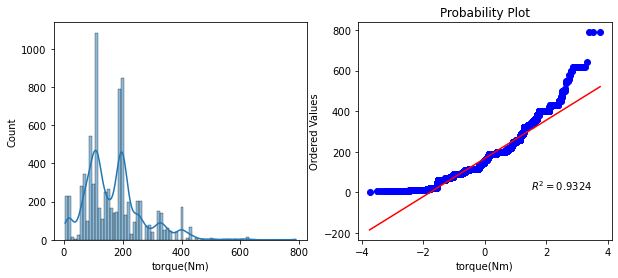

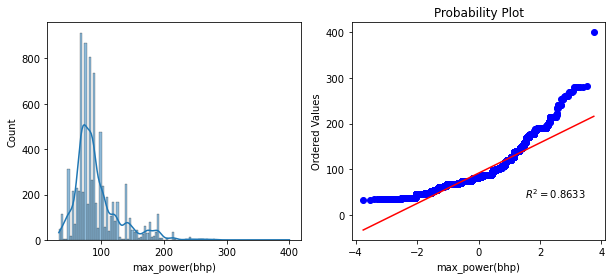

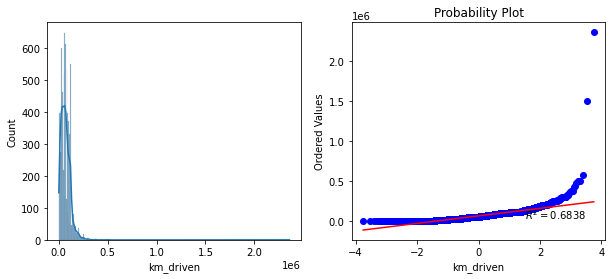

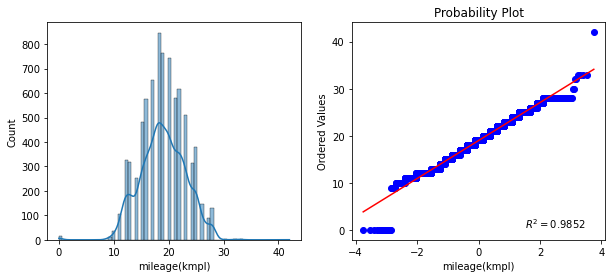

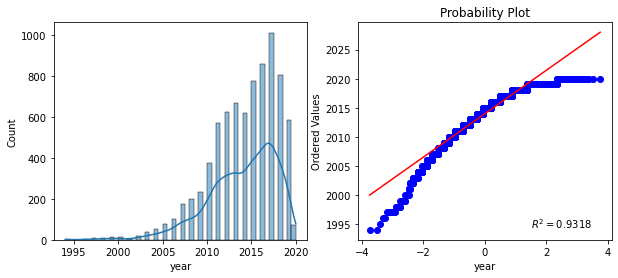

In [13]:
from scipy import stats
from scipy.stats import norm

def QQplot(df,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[variable],kde=True)
    plt.xlabel(variable)
    plt.subplot(1,2,2)
   




    stats.probplot(df[variable],dist="norm",plot=plt,rvalue=True)
    plt.xlabel(variable)
   
a=["torque(Nm)","max_power(bhp)","km_driven","mileage(kmpl)","year"]
for i in a:
    QQplot(df,i)

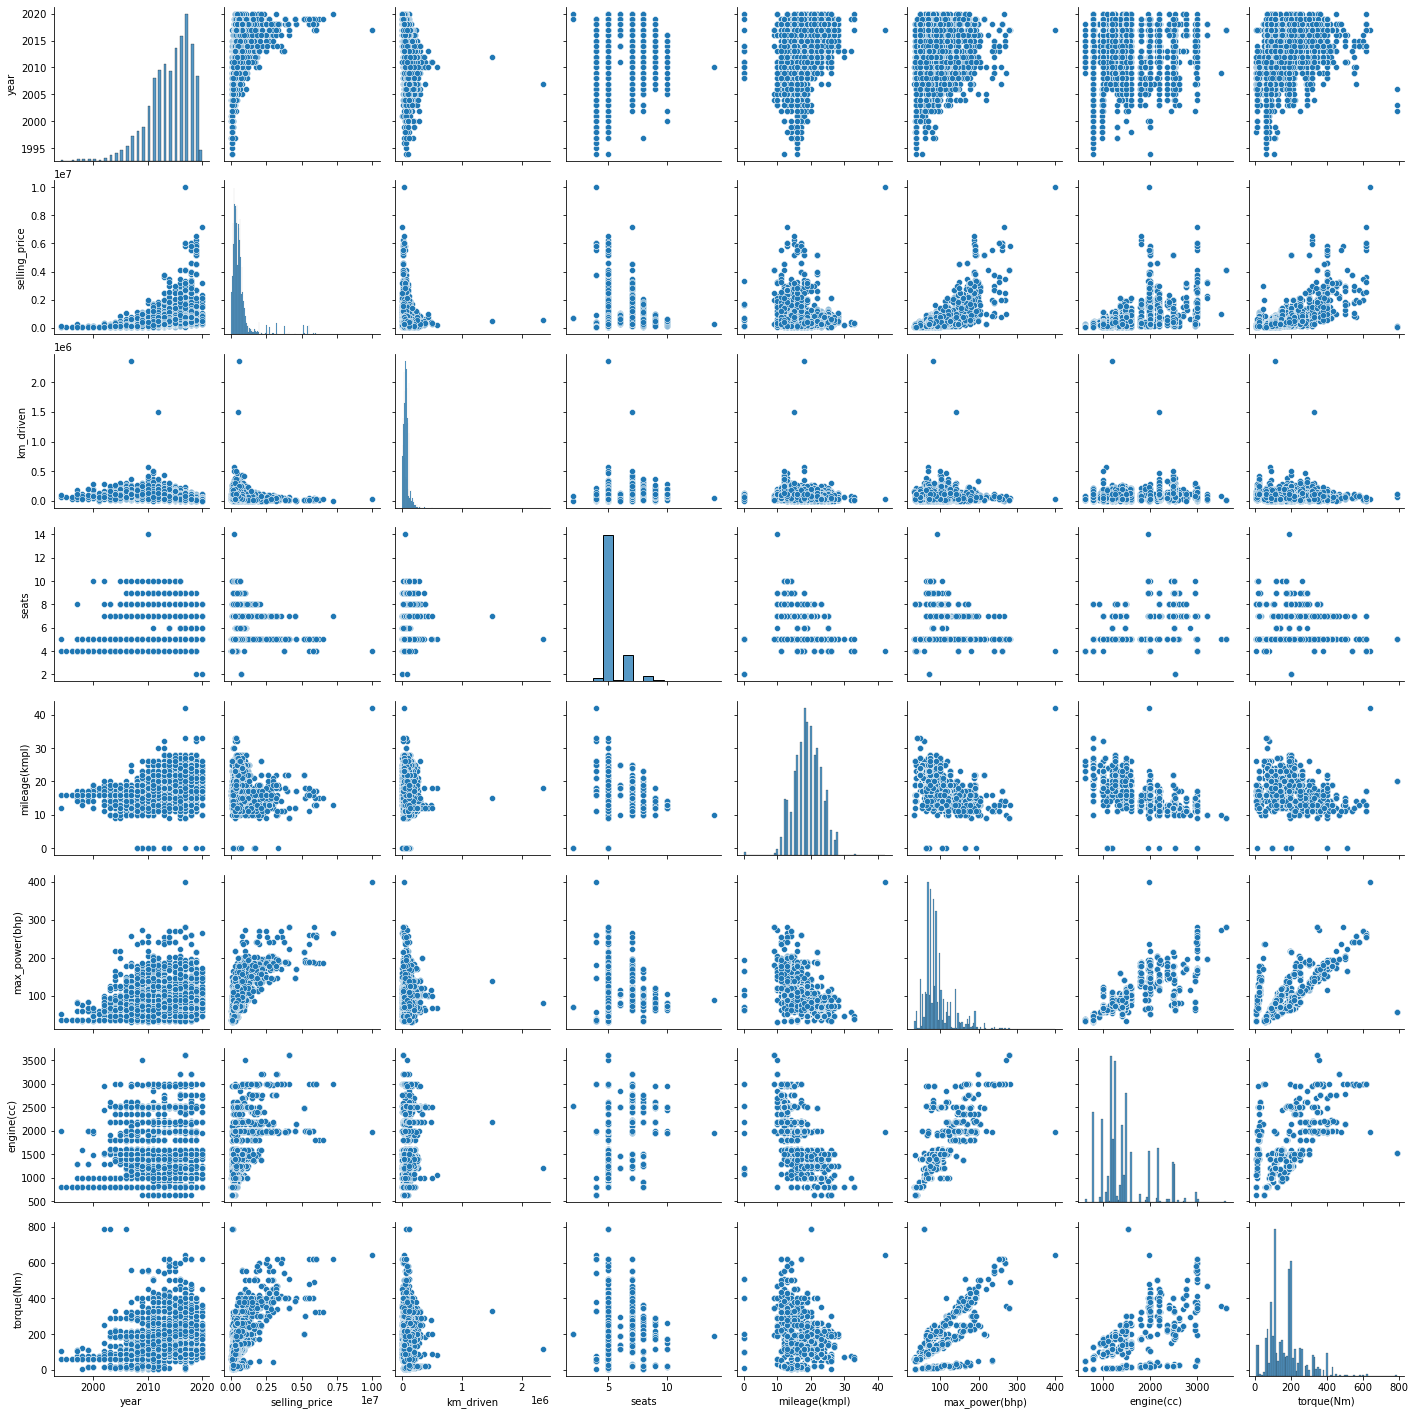

In [14]:
sns.pairplot(df)

Text(0.5, 0, 'max_power(bhp)')

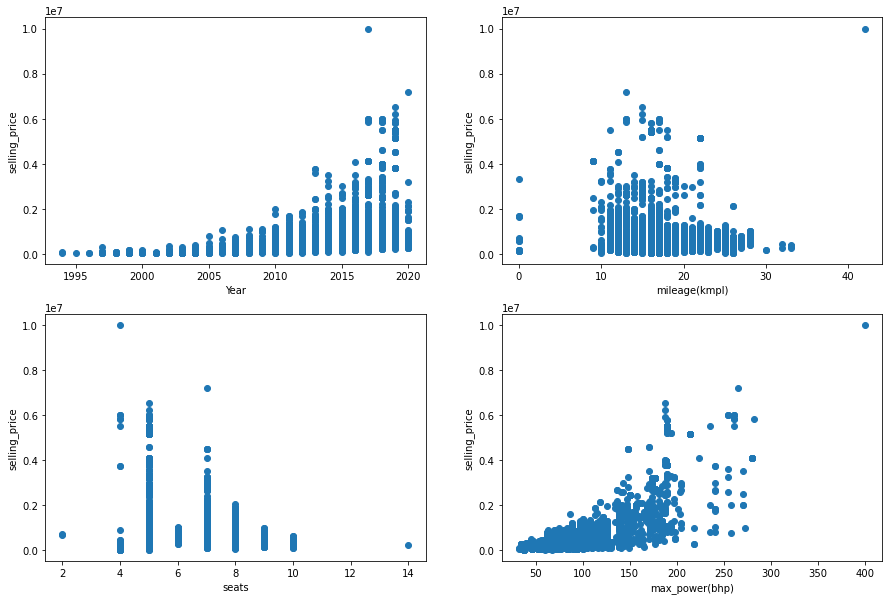

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter("year","selling_price",data=df)
plt.xlabel("Year")
plt.ylabel("selling_price")
plt.subplot(2,2,2)
plt.scatter("mileage(kmpl)","selling_price",data=df)
plt.ylabel("selling_price")
plt.xlabel("mileage(kmpl)")
plt.subplot(2,2,3)
plt.scatter("seats","selling_price",data=df)
plt.ylabel("selling_price")
plt.xlabel("seats")
plt.subplot(2,2,4)
plt.scatter("max_power(bhp)","selling_price",data=df)
plt.ylabel("selling_price")
plt.xlabel("max_power(bhp)")




### year and selling price are highly dependent on each other

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

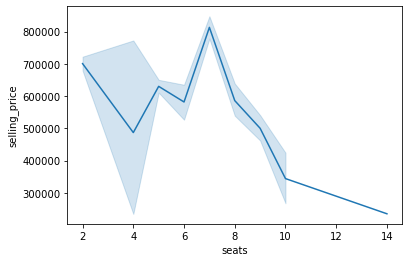

In [16]:
sns.lineplot("seats","selling_price",data=df)

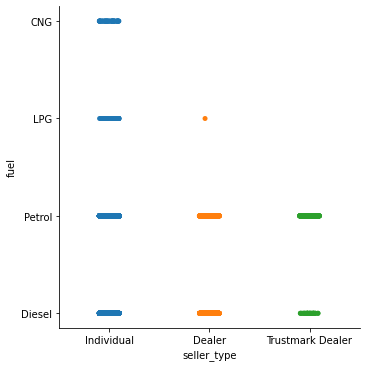

In [17]:
sns.catplot("seller_type","fuel",data=df,kind="strip")



### Some more Data visuilization 

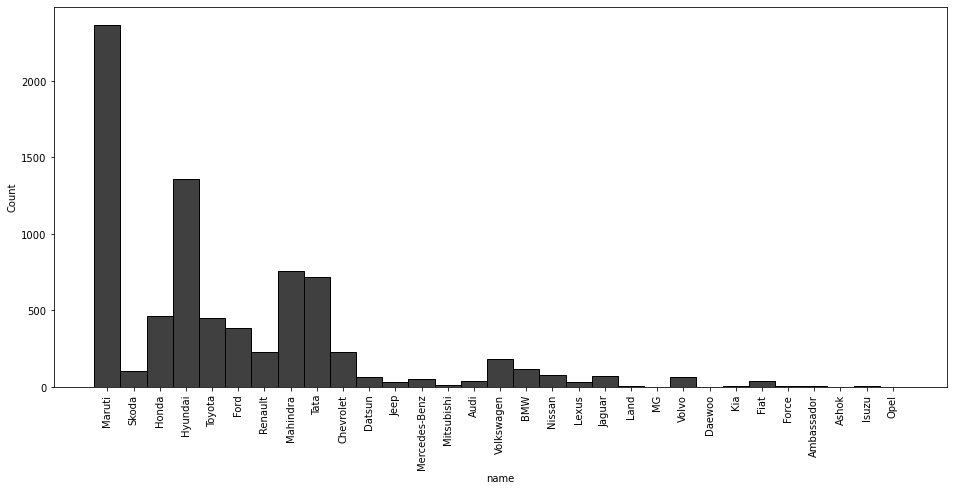

In [39]:
fig_dims = (16, 7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.histplot(x="name",data=df,color="black")
plt.xticks(rotation=90) 
plt.show()


#### selling_price vs name and vs owner

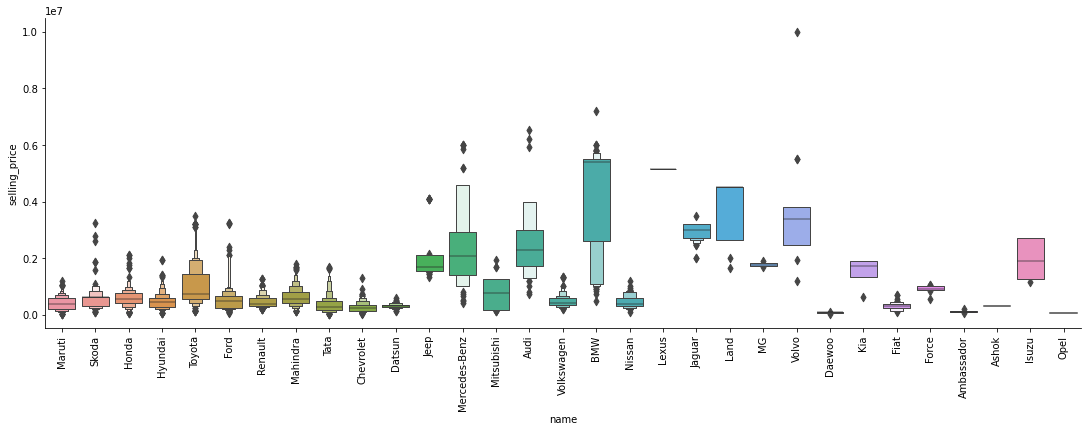

In [36]:
sns.catplot(y='selling_price',x="name",data= df,kind="boxen",height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

### Price is changing with respect to any brand but i think it will not so much useful 

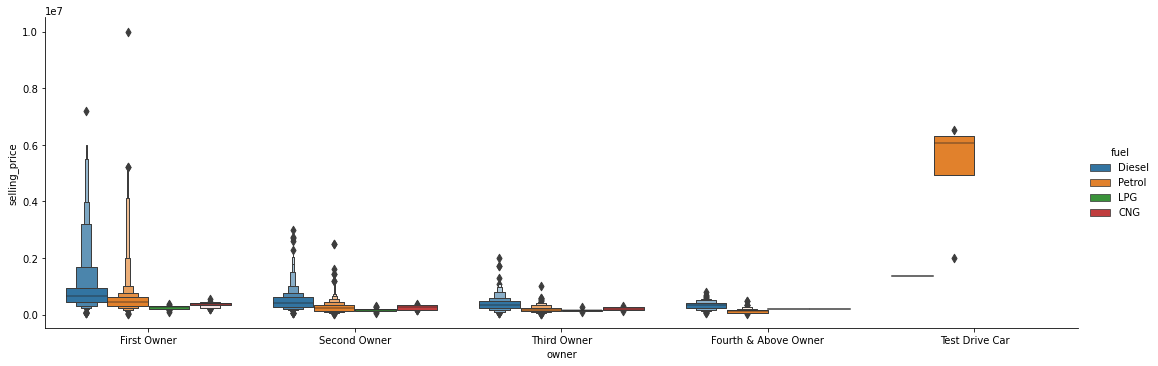

In [38]:
sns.catplot(y='selling_price',x="owner",data= df,kind="boxen",height=5, aspect=3,hue="fuel")

#### Here from above graph we have found that  First Owner car and diesel cars have high price 

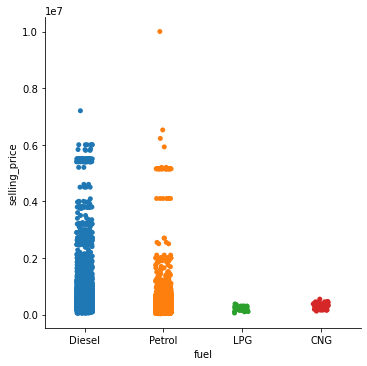

In [20]:
sns.catplot(x="fuel", y="selling_price",data=df)

#### from above graph we found that the LPG and CNG cars price are too low as compare to the Diesel and Petrol

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

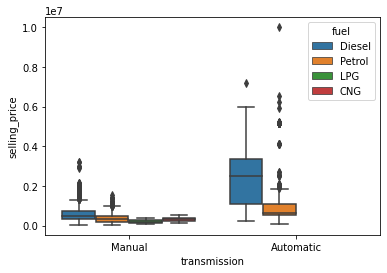

In [24]:
sns.boxplot(x="transmission",y="selling_price",data=df,hue="fuel")

### Automatic Cars have higher price

## Splitting Data to train test split

In [22]:
y=df.iloc[:,2:3]
X=df.drop("selling_price",axis=1)
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.25,random_state=250)



In [23]:
Y_train = Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)

In [29]:
Y_train

,selling_price
0,430000
1,330000
2,140000
3,225000
4,300000
...,...
5924,802999
5925,130000
5926,50000
5927,184000


# Feature Engineering


## Handling Catagorical Features
### Handling  Feature-Fuel

In [30]:
X_train["fuel"].value_counts()
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,Petrol,Individual,Manual,Second Owner,5.0,23,84,1199,114
1,Honda,2012,80000,Petrol,Individual,Manual,Second Owner,5.0,16,116,1497,146
2,Fiat,2009,110000,Petrol,Individual,Manual,Second Owner,5.0,15,67,1172,96
3,Volkswagen,2010,80000,Petrol,Individual,Manual,Second Owner,5.0,14,102,1595,15
4,Mahindra,2007,110000,Diesel,Individual,Manual,First Owner,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,Diesel,Dealer,Manual,First Owner,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,Petrol,Individual,Manual,Second Owner,5.0,18,62,995,90
5926,Maruti,1999,60000,Petrol,Individual,Manual,Fourth & Above Owner,5.0,17,60,993,78
5927,Hyundai,2013,15000,Petrol,Individual,Manual,First Owner,5.0,0,62,1086,96



#### Here below i have used the Label encoding 

In [31]:
def fuel(X_train):
    from sklearn.preprocessing import LabelEncoder
    Label=LabelEncoder()
    X=Label.fit_transform(X_train.fuel)
    X_train.fuel=X
    

In [32]:
fuel(X_train)

In [33]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,3,Individual,Manual,Second Owner,5.0,23,84,1199,114
1,Honda,2012,80000,3,Individual,Manual,Second Owner,5.0,16,116,1497,146
2,Fiat,2009,110000,3,Individual,Manual,Second Owner,5.0,15,67,1172,96
3,Volkswagen,2010,80000,3,Individual,Manual,Second Owner,5.0,14,102,1595,15
4,Mahindra,2007,110000,1,Individual,Manual,First Owner,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,1,Dealer,Manual,First Owner,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,3,Individual,Manual,Second Owner,5.0,18,62,995,90
5926,Maruti,1999,60000,3,Individual,Manual,Fourth & Above Owner,5.0,17,60,993,78
5927,Hyundai,2013,15000,3,Individual,Manual,First Owner,5.0,0,62,1086,96


### Handling Feature - transmission

In [34]:
X_train.transmission.value_counts()

Manual       5138
Automatic     791
Name: transmission, dtype: int64

In [35]:
def transmission(X_train):
    from sklearn.preprocessing import LabelEncoder
    Label=LabelEncoder()
    X=Label.fit_transform(X_train.transmission)
    X_train.transmission=X
  

In [36]:
transmission(X_train)

In [37]:




X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,3,Individual,1,Second Owner,5.0,23,84,1199,114
1,Honda,2012,80000,3,Individual,1,Second Owner,5.0,16,116,1497,146
2,Fiat,2009,110000,3,Individual,1,Second Owner,5.0,15,67,1172,96
3,Volkswagen,2010,80000,3,Individual,1,Second Owner,5.0,14,102,1595,15
4,Mahindra,2007,110000,1,Individual,1,First Owner,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,1,Dealer,1,First Owner,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,3,Individual,1,Second Owner,5.0,18,62,995,90
5926,Maruti,1999,60000,3,Individual,1,Fourth & Above Owner,5.0,17,60,993,78
5927,Hyundai,2013,15000,3,Individual,1,First Owner,5.0,0,62,1086,96


### Handling Feature - owner

In [38]:
X_train['owner'].value_counts()

First Owner             3934
Second Owner            1499
Third Owner              374
Fourth & Above Owner     120
Test Drive Car             2
Name: owner, dtype: int64

#### Here we can use label encoding like this way mention below but i done it by  by replace function

In [39]:
def owner(X_train):
    X_train.replace({"First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner":4,"Test Drive Car":5},inplace=True)
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,3,Individual,1,Second Owner,5.0,23,84,1199,114
1,Honda,2012,80000,3,Individual,1,Second Owner,5.0,16,116,1497,146
2,Fiat,2009,110000,3,Individual,1,Second Owner,5.0,15,67,1172,96
3,Volkswagen,2010,80000,3,Individual,1,Second Owner,5.0,14,102,1595,15
4,Mahindra,2007,110000,1,Individual,1,First Owner,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,1,Dealer,1,First Owner,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,3,Individual,1,Second Owner,5.0,18,62,995,90
5926,Maruti,1999,60000,3,Individual,1,Fourth & Above Owner,5.0,17,60,993,78
5927,Hyundai,2013,15000,3,Individual,1,First Owner,5.0,0,62,1086,96


In [40]:
owner(X_train)


In [41]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,3,Individual,1,2,5.0,23,84,1199,114
1,Honda,2012,80000,3,Individual,1,2,5.0,16,116,1497,146
2,Fiat,2009,110000,3,Individual,1,2,5.0,15,67,1172,96
3,Volkswagen,2010,80000,3,Individual,1,2,5.0,14,102,1595,15
4,Mahindra,2007,110000,1,Individual,1,1,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,1,Dealer,1,1,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,3,Individual,1,2,5.0,18,62,995,90
5926,Maruti,1999,60000,3,Individual,1,4,5.0,17,60,993,78
5927,Hyundai,2013,15000,3,Individual,1,1,5.0,0,62,1086,96



### Handling Feature - seller_type  -Here i have used label encoding

In [42]:
def seller_type(X_train):
    from sklearn.preprocessing import LabelEncoder
    Label=LabelEncoder()
    X=Label.fit_transform(X_train.seller_type)
    X_train.seller_type=X

In [43]:

seller_type(X_train)

In [44]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,Tata,2017,38000,3,1,1,2,5.0,23,84,1199,114
1,Honda,2012,80000,3,1,1,2,5.0,16,116,1497,146
2,Fiat,2009,110000,3,1,1,2,5.0,15,67,1172,96
3,Volkswagen,2010,80000,3,1,1,2,5.0,14,102,1595,15
4,Mahindra,2007,110000,1,1,1,1,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,Honda,2016,50856,1,0,1,1,5.0,26,98,1498,200
5925,Chevrolet,2011,110000,3,1,1,2,5.0,18,62,995,90
5926,Maruti,1999,60000,3,1,1,4,5.0,17,60,993,78
5927,Hyundai,2013,15000,3,1,1,1,5.0,0,62,1086,96


### Handling Feature-name
#### Here firstly i have split name of company  from the feature name and then i have performed frequency encoding on  name 

In [45]:
# using frequency encoding
def freq_encoding_on_name(X_train):
    name_dict=X_train.name.value_counts().to_dict()
    X_train["name"]=X_train["name"].map(name_dict)

In [46]:

freq_encoding_on_name(X_train)


In [47]:

X_train.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,560,2017,38000,3,1,1,2,5.0,23,84,1199,114
1,345,2012,80000,3,1,1,2,5.0,16,116,1497,146
2,32,2009,110000,3,1,1,2,5.0,15,67,1172,96
3,144,2010,80000,3,1,1,2,5.0,14,102,1595,15
4,566,2007,110000,1,1,1,1,7.0,10,120,2179,290


In [48]:
Y_train.iloc[327:329,]

,selling_price
327,229999
328,200000


# Working On test data

#### Same functions which are works on train data are called below here only parameter are changed X_test is used instead of X_train

In [51]:
freq_encoding_on_name(X_test)
owner(X_test)
transmission(X_test)
seller_type(X_test)
fuel(X_test)


## Feature Selection
### By Correlation
#### Some Data have non linear nature to capture non linear nature i have used spearmen rank correlation


<AxesSubplot:>

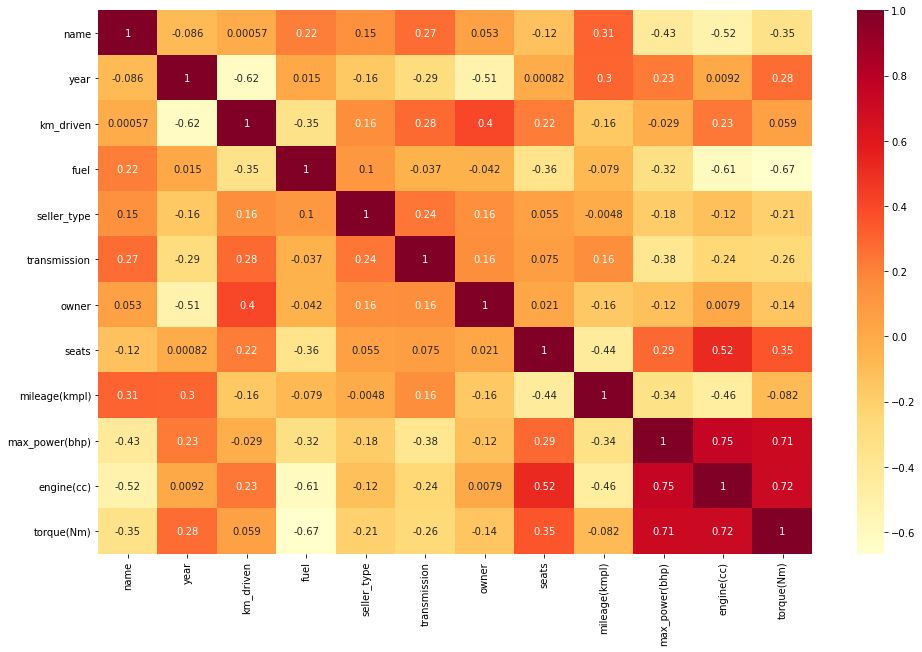

In [55]:
fig,ax=plt.subplots(figsize=(16,10))
plt.savefig("fig")

sns.heatmap(X_train.corr(method='spearman'),annot=True,cmap='YlOrRd')
# by default the .corr method use pearson correlation ,but here i have used spearman ,because spearman works well on non linear data

### By Extra Tree Regressor

#### Extra Tree Regressor is a Feature selection technique used to select feature which are highly important with respect to target variable

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train,Y_train)

ExtraTreesRegressor()

In [58]:
model.feature_importances_

array([0.05709909, 0.1394705 , 0.03937186, 0.01778689, 0.01632208,
       0.28072351, 0.00813468, 0.00701889, 0.02205258, 0.21884436,
       0.06115906, 0.13201649])

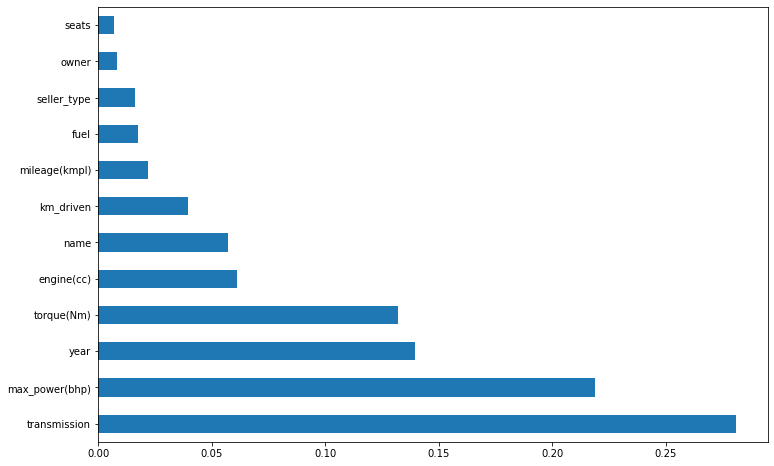

In [59]:
plt.figure(figsize = (12,8))
ranked_features = pd.Series(model.feature_importances_, index=X_train.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

#### This above Extra Regressor gives me my important feature according to my target variable

In [61]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage(kmpl),max_power(bhp),engine(cc),torque(Nm)
0,560,2017,38000,3,1,1,2,5.0,23,84,1199,114
1,345,2012,80000,3,1,1,2,5.0,16,116,1497,146
2,32,2009,110000,3,1,1,2,5.0,15,67,1172,96
3,144,2010,80000,3,1,1,2,5.0,14,102,1595,15
4,566,2007,110000,1,1,1,1,7.0,10,120,2179,290
...,...,...,...,...,...,...,...,...,...,...,...,...
5924,345,2016,50856,1,0,1,1,5.0,26,98,1498,200
5925,167,2011,110000,3,1,1,2,5.0,18,62,995,90
5926,1775,1999,60000,3,1,1,4,5.0,17,60,993,78
5927,1002,2013,15000,3,1,1,1,5.0,0,62,1086,96


In [62]:
X_train.drop(["name"],axis=1,inplace=True)
X_test.drop(["name"],axis=1,inplace=True)

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
Y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,Y_test))

Accuracy on Training set:  0.6912746079850909
Accuracy on Testing set:  0.6448699155810839


In [64]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error=', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared  Error=', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared  Error=', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Error =', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error= 287470.9843182306
Mean Squared  Error= 240061861001.68622
Root Mean Squared  Error= 489961.08110918995
R Squared Error = 0.6448699155810839


Text(0, 0.5, 'Predicted value')

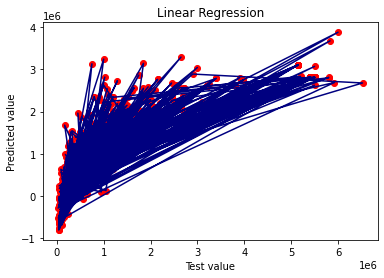

In [65]:
plt.scatter(Y_test, linear_reg.predict(X_test), color = 'red')
plt.plot(Y_test, linear_reg.predict(X_test), color = 'navy')
plt.title('Linear Regression')
plt.xlabel('Test value')
plt.ylabel('Predicted value')

### Here above i have used linear regression but as known it do not gives good accuracy so we will use random forest 

#### Firstly I have used cross validation 

In [66]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model =RandomForestRegressor()
# evaluate model
scores = cross_val_score(model, X_train, Y_train, scoring=None, cv=cv, n_jobs=-1)
print(scores)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.93428718 0.97492632 0.97379568 0.98078118 0.94866361 0.98325412
 0.9796366  0.97362832 0.97174939 0.9638296 ]
Accuracy: 0.968 (0.015)


### Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=13, min_samples_split=8, n_estimators=150)
rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test)
print("Accuracy on Training set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))




Accuracy on Training set:  0.9871395399349285
Accuracy on Testing set:  0.9673947203970349


In [68]:
print('Mean Absolute Error=', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared  Error=', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared  Error=', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R Squared Error =', metrics.r2_score(Y_test, Y_pred))


Mean Absolute Error= 72759.89816348239
Mean Squared  Error= 22040611154.573288
Root Mean Squared  Error= 148460.80679618203
R Squared Error = 0.9673947203970349


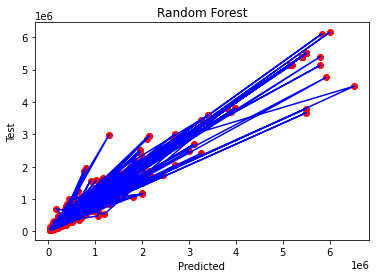

In [69]:
plt.scatter(Y_test, rf.predict(X_test), color = 'red')
plt.plot(Y_test, rf.predict(X_test), color = 'blue')
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

In [40]:
rf.predict([[2019,7500,1,0,0,1,5.0,16,190,19000,400]])## Actual price for this data is around 5400000 and i got arround 52.7 not soo bad

NameError: name 'rf' is not defined

#### Below there is a code for hyperparameter tuning which i have used but i have comment down this code because it takes too much time to execute every time


Text(0, 0.5, 'y')

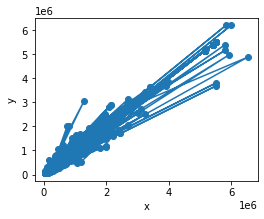

In [70]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(Y_test,Y_pred)
ax.plot(Y_test,Y_pred)

ax.set_xlabel('x')
ax.set_ylabel('y')

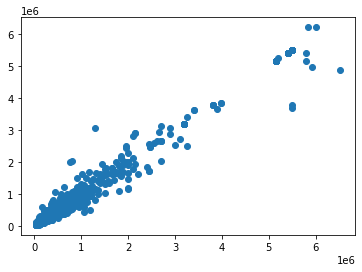

In [71]:
plt.scatter(Y_test,Y_pred)

### Using Xgboost

In [72]:
from xgboost import XGBRegressor
xg_reg=XGBRegressor( learning_rate=0.1, max_depth=6, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=1.0, verbosity=0)

In [73]:
xg_reg=xg_reg.fit(X_train,Y_train)

Y_pred_model2 = xg_reg.predict(X_test)
print("Accuracy on Training set: ",rf.score(X_train,Y_train))

print("Accuracy on Testing set: ",rf.score(X_test,Y_test))


Accuracy on Training set:  0.9871395399349285
Accuracy on Testing set:  0.9673947203970349


In [74]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


print('Mean Absolute Error=', metrics.mean_absolute_error(Y_test, Y_pred_model2))
print('Mean Squared  Error=', metrics.mean_squared_error(Y_test, Y_pred_model2))
print('Root Mean Squared  Error=', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_model2)))
print('R Squared Error =', metrics.r2_score(Y_test, Y_pred_model2))










Mean Absolute Error= 73660.73784853946
Mean Squared  Error= 18416408844.6145
Root Mean Squared  Error= 135707.06998758207
R Squared Error = 0.9727561021130496


In [75]:
value=np.array([[2019,7500,1,0,0,1,5.0,16,190,19000,400]])
xg_reg.predict(value)

array([5496093.], dtype=float32)

In [76]:
X_train.fuel.unique()

array([3, 1, 2, 0])

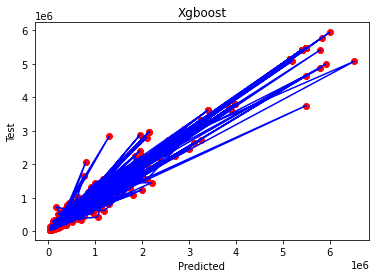

In [77]:
plt.scatter( Y_test, xg_reg.predict(X_test), color = 'red')
plt.plot(Y_test, xg_reg.predict(X_test), color = 'blue')
plt.title('Xgboost')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

In [78]:
import pickle
pickle_model=pickle.dump(xg_reg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))




In [79]:
list=[[2019,7500,1,0,0,1,5.0,16,190,19000,400]]
a=np.array(list)
model.predict(a)

array([5496093.], dtype=float32)